In [1]:
import numpy as np
import datetime
import pandas as pd

import time
import pickle
import os

import matplotlib.pyplot as plt
import matplotlib



In [20]:
def importWebPlotDigitizerMultiBars(f,n):
    df = pd.read_csv(f,header=[0])
    columns = df.columns
    df = df.filter(reversed(columns[1::2]))
    df.index = np.arange(len(df))+n-1
    df = df.drop(n-1)
    df.columns = reversed(columns[::2])
    
    return df.astype("float64")
    

dict_keys(['delay', 'tests', 'fpos', 'tests_age', 'fpos_age', 'test100_age', 'pos100_age'])


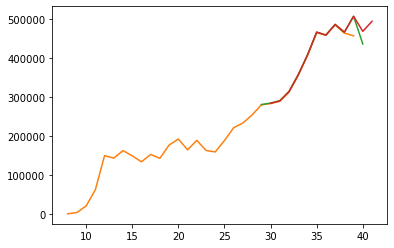

In [65]:
# LabSurveillanceData
labSurveillance = {}

# Report 24.04.2020, data up to 23.04.2020
tested_by_age = {"0-4":(10945,282),"5-14":(15357,664),"15-34":(137348,9434),"35-59":(227742,17861),"60-79":(92386,9216),"80+":(50129,5169),"ukn":(3248,None)}
tested_by_sex = {"m":(223452,15488),"w":(192317,16034),"ukn":(121386,11390)}

tests_per_week = {8:1403}
fraction_pos_per_week = {8:86/1403.}

labSurveillance[datetime.date(2020,4,24)] = {"tests":tests_per_week,"fpos":fraction_pos_per_week}


# Report 30.09.2020, data up to 29.09.2020
tests_per_week = {8:1714,9:4941,10:21739,11:63241,12:150692,13:144269,14:163538,15:150198,16:134881,17:153656,18:143775,19:177866,20:193182,
                21:165514,22:189723,23:164032,24:160079,25:189229,26:222332,27:234190,28:254941,29:280632,30:284091,
                31:290020,32:313241,33:356225,34:407115,35:465415,36:458992,37:485178,38:464427,39:457510} # Source: Abb.1+Text Abb.2
fraction_pos_per_week = {8:92/1714.,9:0.0153,10:0.0254,11:0.0714,12:0.0845,13:0.0986,14:0.0979,15:0.0824,16:0.0669,17:0.0500,18:0.0364,19:0.0235,20:0.0167,
                        21:0.0134,22:0.0096,23:0.0077,24:0.0073,25:0.0082,26:0.0063,27:0.0056,28:0.0056,29:0.0068,30:0.0080,
                         31:0.0094,32:0.0099,33:0.0096,34:0.0089,35:0.0073,36:0.0073,37:0.0089,38:0.0115,39:0.0108} # Source Abb.2, fraction

tested_by_age = {"0-4":(192253,1522),"5-14":(354174,3151),"15-34":(1406083,30300),"35-59":(1971660,41913),"60-79":(1037268,18576),"80+":(569439,10787),"ukn":(62199,None)}
tested_by_sex = {"m":(2139552,41495),"w":(2513072,43326),"ukn":(940452,24873)}

tests_per_age_week = importWebPlotDigitizerMultiBars("test_perAge200930.csv",9).astype("int64")
fraction_pos_per_age_week = importWebPlotDigitizerMultiBars("positiveRate_perAge200930.csv",9)
tests_p10000_per_age_week = importWebPlotDigitizerMultiBars("test-100000_perAge200930.csv",9)
positive_p10000_per_age_week = importWebPlotDigitizerMultiBars("positive-10000_perAge200930.csv",9)

labSurveillance[datetime.date(2020,9,30)] = {"delay":testingDelay,"tests":tests_per_week,"fpos":fraction_pos_per_week,"tests_age":tests_per_age_week,"fpos_age":fraction_pos_per_age_week,"test100_age":tests_p10000_per_age_week,"pos100_age":positive_p10000_per_age_week}


# Report 06.10.2020
testingDelay = importWebPlotDigitizerMultiBars("Delay_201006.csv",29).clip(0,1)
testingDelay["> 5 Days"] = 1-testingDelay["4 Days"]
for i in range(4,0,-1):
    testingDelay["%d Days"%i] = testingDelay["%d Days"%i]-testingDelay["%d Days"%(i-1)]

tests_per_week = {29:281463,30:285289,31:291241,32:315051,33:357993,34:408588,35:466837,36:459609,37:486820,38:466412,39:507228,40:436650}
fraction_pos_per_week = {29:.00658,30:.00788,31:.00925,32:.00953,33:.00941,34:.00865,35:.00711,36:.00706,37:.00854,38:.0113,39:.0109,40:.0137}

# Important Note: Dataset is week29-40 only
tested_by_age = {"0-4":(124744,810),"5-14":(282129,2539),"15-34":(1022684,13681),"35-59":(1303028,12366),"60-79":(632716,3649),"80+":(315705,1214),"ukn":(37772,None)}
tested_by_sex = {"m":(1446664,13934),"w":(1703309,15113),"ukn":(568805,6771)}

tests_per_age_week = importWebPlotDigitizerMultiBars("test_perAge202006.csv",29).astype("int64")
fraction_pos_per_age_week = importWebPlotDigitizerMultiBars("positiveRate_perAge201006.csv",29)
tests_p10000_per_age_week = importWebPlotDigitizerMultiBars("test-100000_perAge201006.csv",29)
positive_p10000_per_age_week = importWebPlotDigitizerMultiBars("positive-10000_perAge201006.csv",29)

labSurveillance[datetime.date(2020,10,6)] = {"delay":testingDelay,"tests":tests_per_week,"fpos":fraction_pos_per_week,"tests_age":tests_per_age_week,"fpos_age":fraction_pos_per_age_week,"test100_age":tests_p10000_per_age_week,"pos100_age":positive_p10000_per_age_week}


# Report 13.10.2020
testingDelay = importWebPlotDigitizerMultiBars("Delay_201013.csv",30).clip(0,1)
testingDelay["> 5 Days"] = 1-testingDelay["4 Days"]
for i in range(4,0,-1):
    testingDelay["%d Days"%i] = testingDelay["%d Days"%i]-testingDelay["%d Days"%(i-1)]

tests_per_week = {30:284623,31:290831,32:314709,33:357689,34:407832,35:467049,36:459408,37:486628,38:467049,39:507641,40:468959,41:494747}
fraction_pos_per_week = {30:.007866,31:.009254,32:.009512,33:.009409,34:.008638,35:.007112,36:.007078,37:.008518,38:.01129,39:.01087,40:.01398,41:.02091}

# Important Note: Dataset is week30-41 only
tested_by_age = {"0-4":(120327,932),"5-14":(291573,2929),"15-34":(1089134,16385),"35-59":(1365331,15400),"60-79":(653367,4768),"80+":(322844,1673),"ukn":(36297,None)}
tested_by_sex = {"m":(1512711,17053),"w":(1773385,18337),"ukn":(592777,8159)}

tests_per_age_week = importWebPlotDigitizerMultiBars("test_perAge201013.csv",30).astype("int64")
fraction_pos_per_age_week = importWebPlotDigitizerMultiBars("positiveRate_perAge201013.csv",30)
tests_p10000_per_age_week = importWebPlotDigitizerMultiBars("test-100000_perAge201013.csv",30)
positive_p10000_per_age_week = importWebPlotDigitizerMultiBars("positive-10000_perAge201006.csv",30)

labSurveillance[datetime.date(2020,10,13)] = {"delay":testingDelay,"tests":tests_per_week,"fpos":fraction_pos_per_week,"tests_age":tests_per_age_week,"fpos_age":fraction_pos_per_age_week,"test100_age":tests_p10000_per_age_week,"pos100_age":positive_p10000_per_age_week}

keys = labSurveillance[datetime.date(2020,10,13)].keys()
print(keys)

for i,k in enumerate(["tests"]):
    for d,v in labSurveillance.items():
        vk = v.get(k,None)
        if type(vk) != type(None):
            if type(vk) == dict:
                plt.plot(vk.keys(),vk.values())
            else:
                for c in vk.columns:
                    plt.plot(vk[c])

